In [150]:
##Importazione librerie

In [142]:
import os
import pandas as pd
import zipfile

%matplotlib inline
import matplotlib.pyplot as plt

pd.options.display.max_columns = 44

In [ ]:
##Caricamento dati pronti all'uso di dati.istat.it

In [143]:
z = zipfile.ZipFile(os.path.join("E:\FILE TEMPORANEI", "DCCV_OCCUPATIT -  Employment                                 - Full dataset.gz"))
df_dati = pd.read_csv(z.open("DCCV_OCCUPATIT_Data+FootnotesLegend_175b2401-3654-4673-9e60-b300989088bb.csv"), encoding ="cp1252", sep="|", engine = "python")


In [ ]:
## filtro dataset per i dati di torino

In [144]:
torino_genere = df_dati[(df_dati["Territorio"] == "Torino") & (df_dati["Sesso"] != "totale")]


In [145]:
torino_genere["TIME"] = torino_genere["TIME"].map(int)



c:\Users\SANTECH\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [146]:
torino_genere = torino_genere[["Sesso", "0", "TIME"]]#.plot()
torino_genere.columns = ["Sesso", "Valore", "TIME"]

In [147]:
torino_genere = torino_genere.pivot(index='TIME',columns='Sesso')

In [ ]:
## Variazione occupazione per genere, numero indice 2004 = 100

In [148]:
plot_genere = torino_genere.divide(torino_genere.loc[2004]) * 100
plot_genere

Valore            
Sesso     femmine      maschi
TIME                         
2004   100.000000  100.000000
2005   102.502803  101.369150
2006   105.916000  100.517959
2007   107.155930  100.437320
2008   110.616837  101.232273
2009   105.757228   99.133177
2010   105.586203   96.947150
2011   109.555231   97.889847
2012   109.781005   96.642132
2013   107.041218   94.148418
2014   106.186094   93.482525

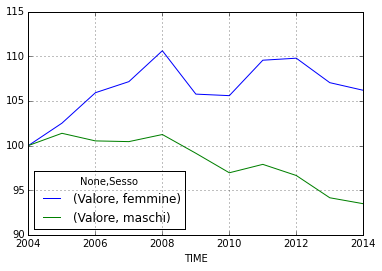

In [149]:
#L'occupazione femminile e ricresciuta a livelli pre-crisi ed è aumentata rispetto al 2004
#Occupazione per genere, numero indice base 2004 = 100
plot_genere.plot()